# Simple graph formation game

import

In [2]:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt



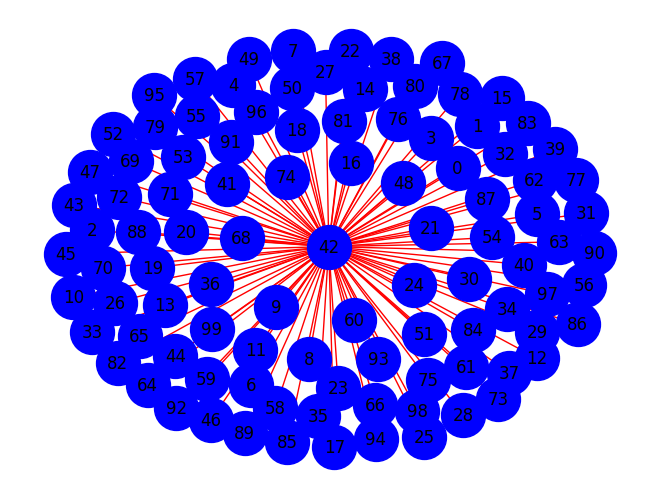

In [9]:
#number of nodes
N = 100

#empty graph
G = nx.Graph()
G.add_nodes_from(range(N))

#assign random time for each node
T = {v:random.random() for v in range(N)}
#sorted for the order
sorted_nodes = sorted(T,key=T.get)

for node in sorted_nodes:
    # values of every nodes 
    values = {other:len(G[other]) for other in G.nodes if other !=node}
    max_value = max(values.values())
    #Case their is few nodes with the same value (max)
    best_nodes = [node for node,value in values.items() if value == max_value]
    chosen_node = random.choice(best_nodes)
    G.add_edge(node,chosen_node)

nx.draw(G,with_labels=True,node_color='blue',node_size= 1000,edge_color="red")
plt.show()
    
    
    

The node with the highest number is one of the first two nodes of the first link. All the other one have 1 in value 

Not surprise but does this is what we want ? 

Let's add a subtility by changing the perceived_value of node between 50% and 150% of it's real value

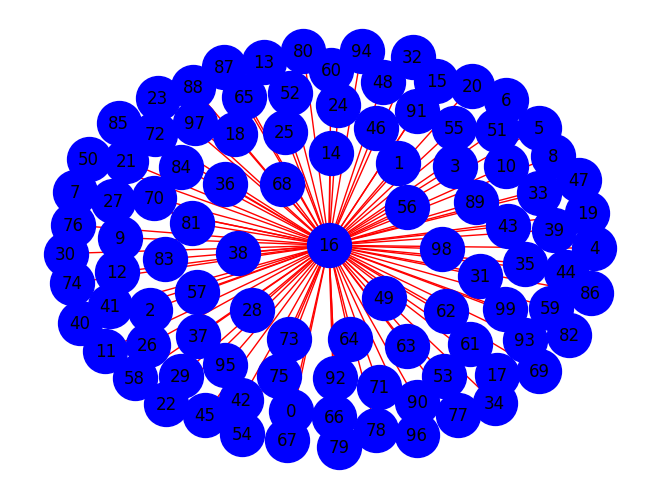

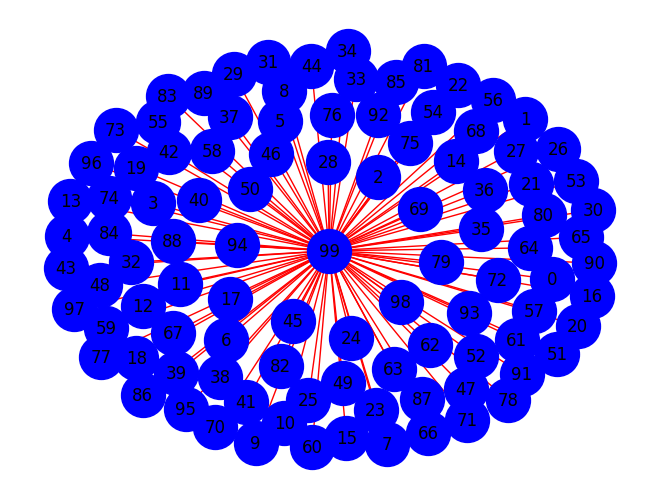

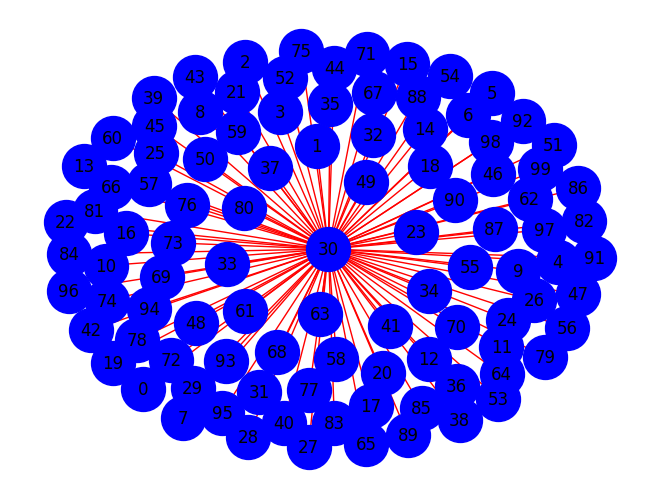

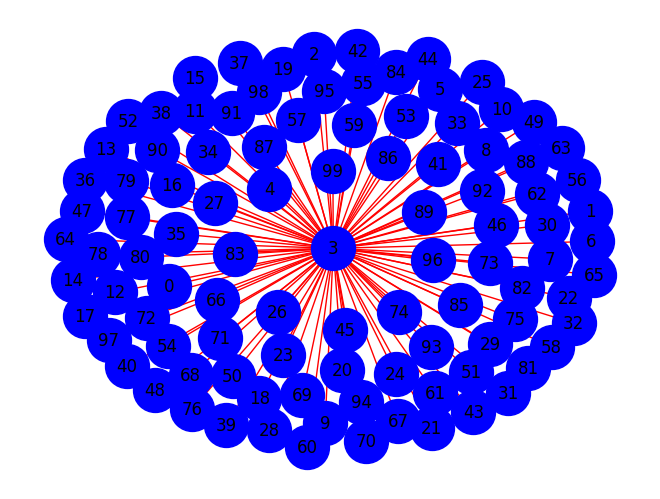

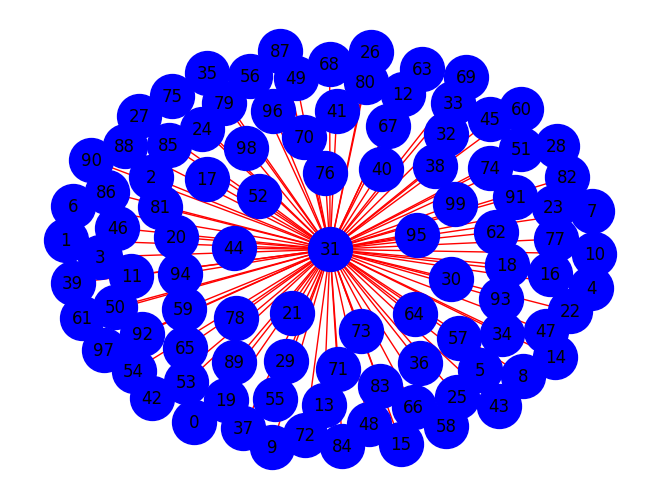

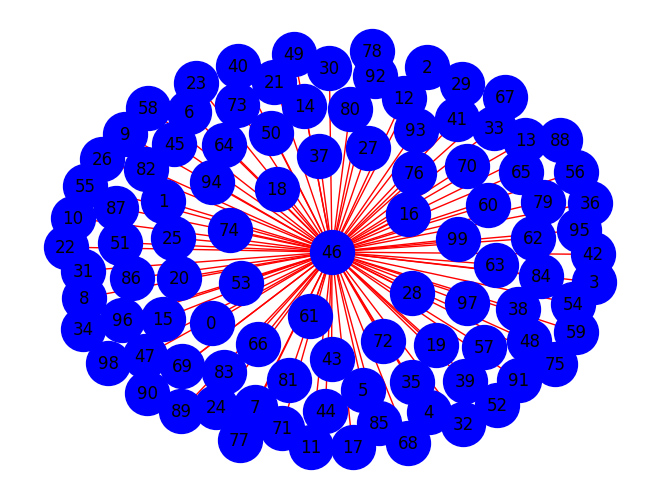

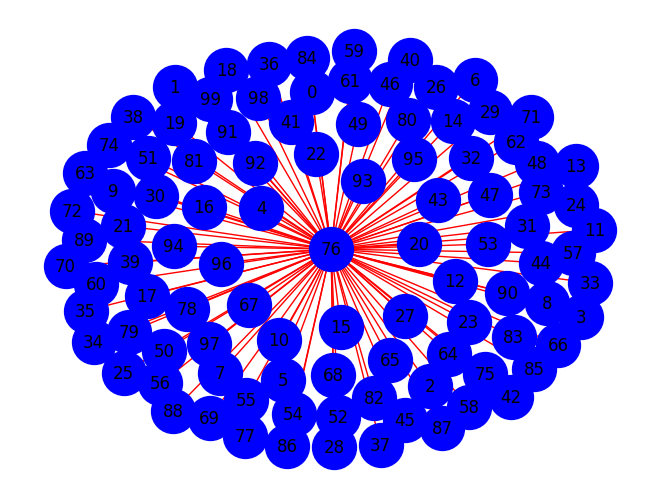

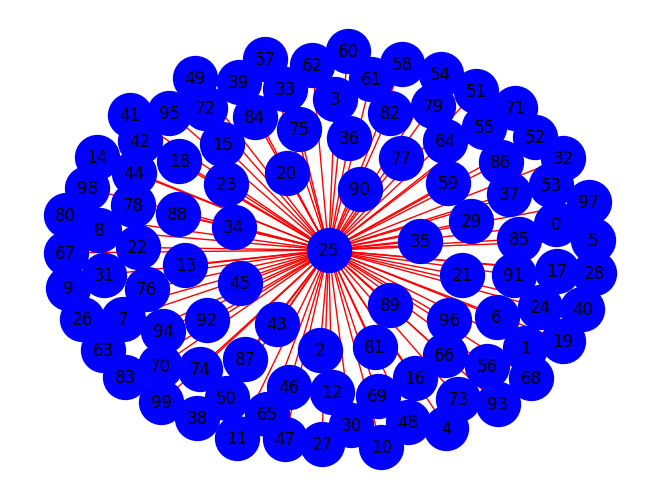

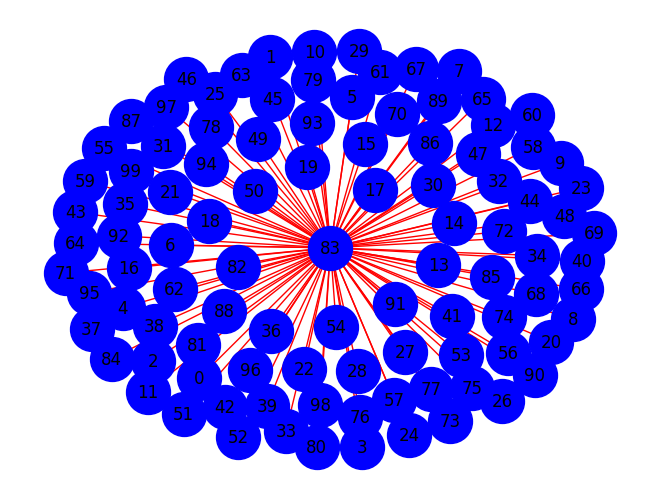

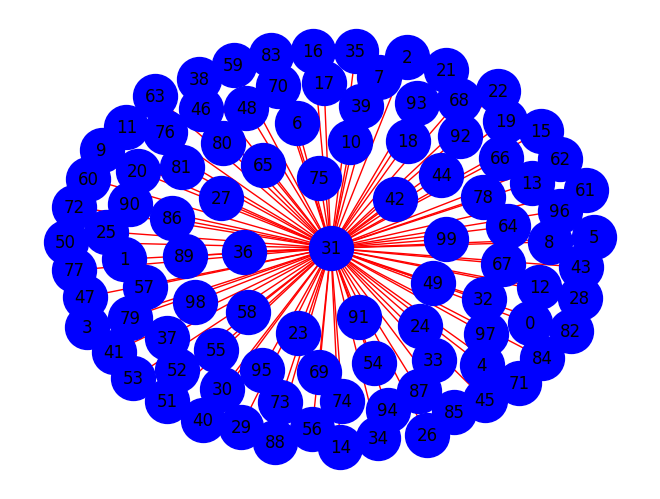

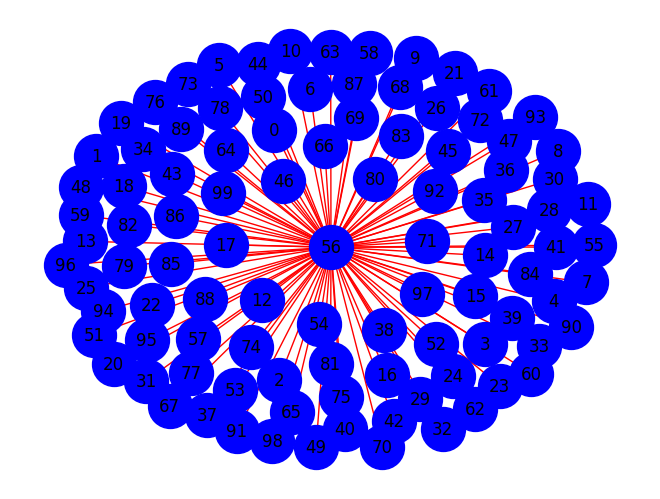

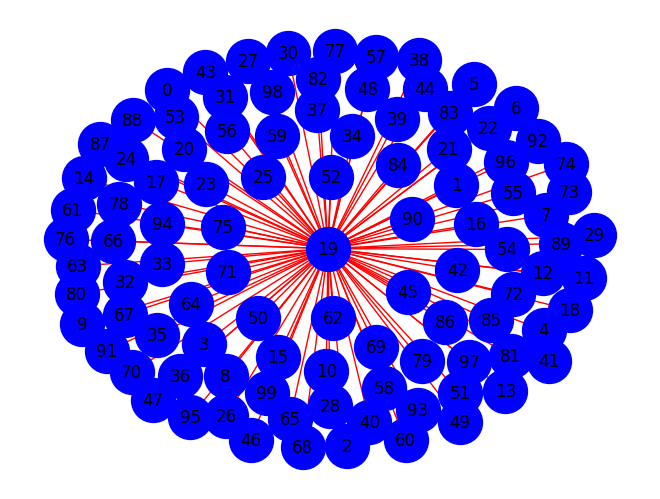

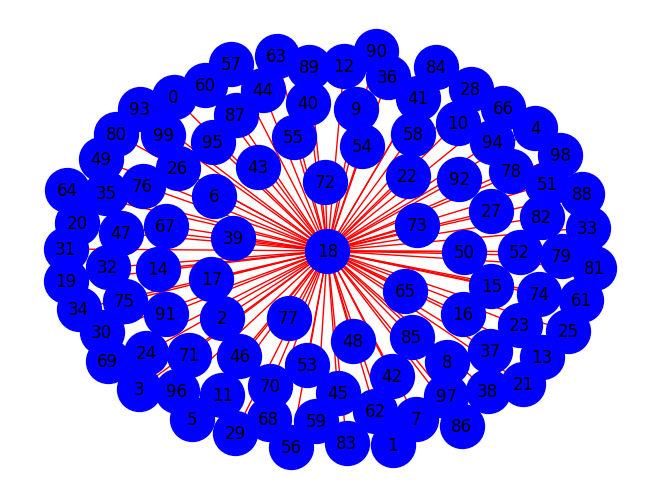

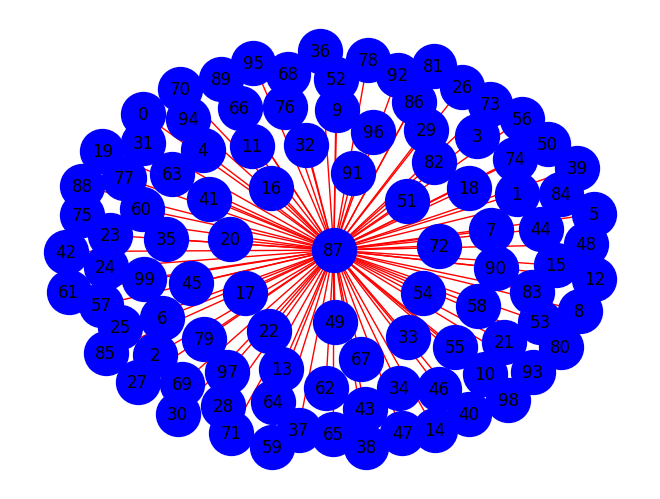

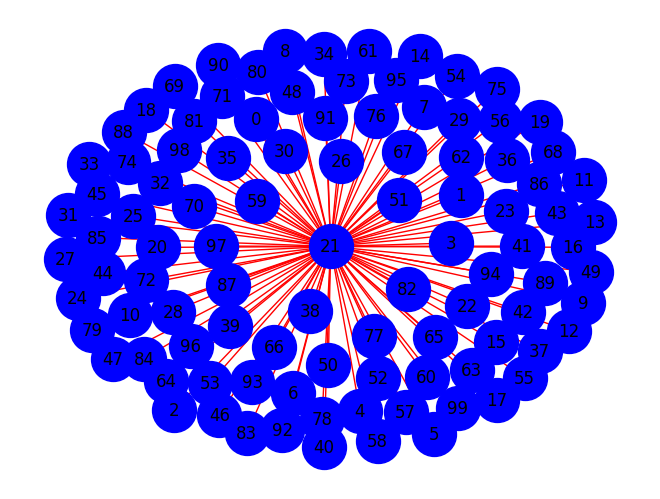

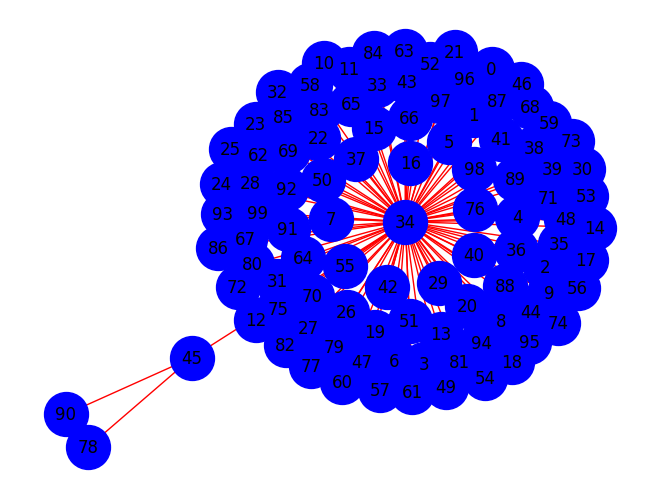

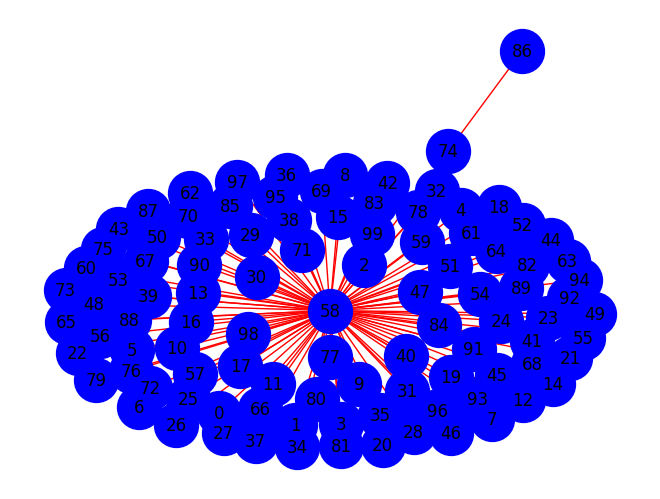

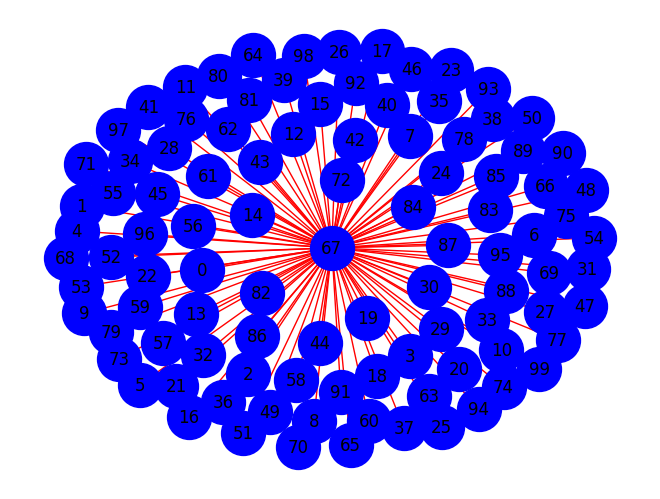

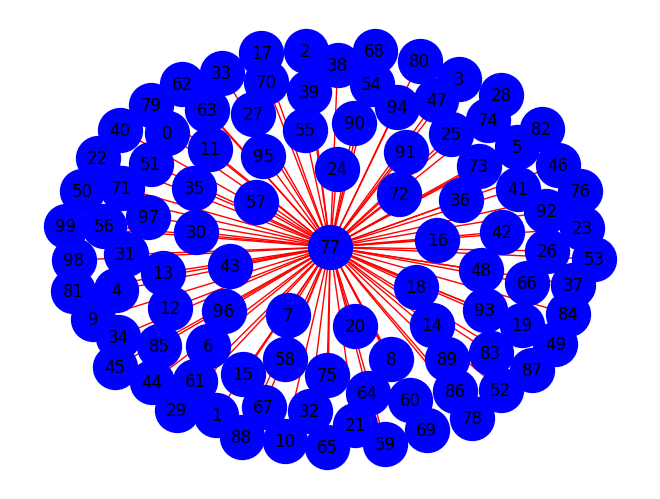

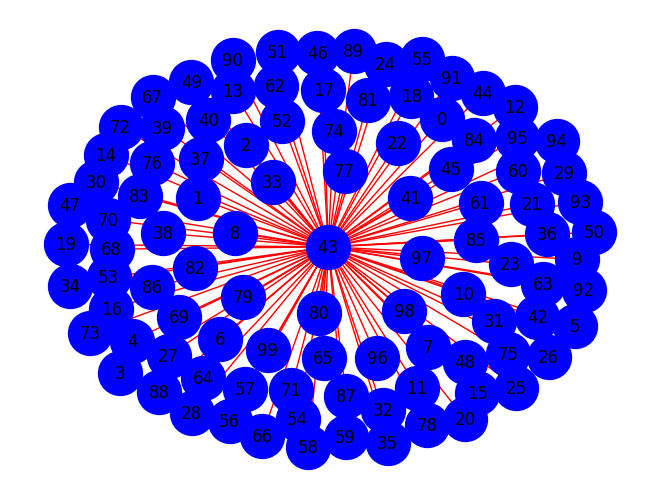

In [53]:
#number of nodes
N = 100

for i in range(0,20):
    #empty graph
    G = nx.Graph()
    G.add_nodes_from(range(N))

    #assign random time for each node
    T = {v:random.random() for v in range(N)}
    #sorted for the order
    sorted_nodes = sorted(T,key=T.get)
    for node in sorted_nodes:
        # values of every nodes 
        perceived_values = {other:len(G[other])*random.uniform(0.5,1.5) for other in G.nodes if other !=node}
        max_value = max(perceived_values.values())
        #Case their is few nodes with the same value (max)
        best_nodes = [node for node,value in perceived_values.items() if value == max_value]
        chosen_node = random.choice(best_nodes)
        G.add_edge(node,chosen_node)

    nx.draw(G,with_labels=True,node_color='blue',node_size= 1000,edge_color="red")
    plt.show()
    
    
    

## Bilan